In [129]:
pcap = '/scratch/datasets/vcqoe/nm-mngd-20210518-6df15aaf/extract/tmp/Data/meet/client-teams-1683450425.pcap'
csv = '/scratch/datasets/vcqoe/nm-mngd-20210518-f9511f7a/extract/tmp/Data/meet/client-meet-1683506345.csv'
webrtc = '/scratch/datasets/vcqoe/nm-mngd-20210518-f9511f7a/extract/tmp/Data/meet/client-meet-1683506345.json'

In [130]:
%run '../vca_perf/qoe_estimation/rtp/model.py'
%run '../vca_perf/config.py'
%run '../vca_perf/util/helper_functions.py'

In [131]:
model = RTPModel('meet', 'framesReceived', project_config, 'vcqoe')

In [132]:
df = read_net_file('vcqoe', csv)
df.groupby(['ip.src', 'ip.dst', 'ip.proto']).agg({'udp.srcport': max, 'udp.dstport': max, 'udp.length': sum})

,,,udp.srcport,udp.dstport,udp.length
ip.src,ip.dst,ip.proto,,,
142.250.82.185,10.0.0.30,17,3478.00,44999.00,4995348.00


In [133]:
df1 = df[(df['ip.src'] == '142.250.82.185')]
df1

,frame.time_relative,frame.time_epoch,ip.src,ip.dst,ip.proto,ip.len,udp.srcport,udp.dstport,udp.length,rtp.ssrc,rtp.timestamp,rtp.seq,rtp.p_type,rtp.marker
2135,42.52,1683506390.93,142.250.82.185,10.0.0.30,17,292,3478.00,44999.00,272.00,0x6c3f47e7,0.00,25377.00,46,0.00
2136,42.52,1683506390.93,142.250.82.185,10.0.0.30,17,1026,3478.00,44999.00,1006.00,0xe4ad6a6f,829111539.00,0.00,98,0.00
2137,42.52,1683506390.93,142.250.82.185,10.0.0.30,17,1028,3478.00,44999.00,1008.00,0x6c3f47e7,829111539.00,25378.00,99,0.00
2139,42.55,1683506390.95,142.250.82.185,10.0.0.30,17,1031,3478.00,44999.00,1011.00,0xe4ad6a6f,829111539.00,1.00,98,0.00
2140,42.55,1683506390.95,142.250.82.185,10.0.0.30,17,1031,3478.00,44999.00,1011.00,0xe4ad6a6f,829111539.00,2.00,98,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7516,69.55,1683506417.96,142.250.82.185,10.0.0.30,17,1018,3478.00,44999.00,998.00,0xe4ad6a6f,831548379.00,4545.00,98,0.00
7518,69.55,1683506417.96,142.250.82.185,10.0.0.30,17,1018,3478.00,44999.00,998.00,0xe4ad6a6f,831548379.00,4546.00,98,0.00
7519,69.55,1683506417.96,142.250.82.185,10.0.0.30,17,1018,3478.00,44999.00,998.00,0xe4ad6a6f,831548379.00,4547.00,98,0.00
7520,69.55,1683506417.96,142.250.82.185,10.0.0.30,17,1018,3478.00,44999.00,998.00,0xe4ad6a6f,831548379.00,4548.00,98,1.00


(-1.0, 100.0)

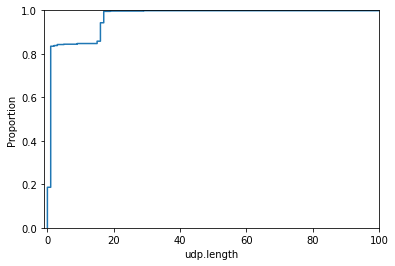

In [140]:
dfg = df1.groupby('rtp.timestamp').agg({'udp.length': lambda x: max(x)-min(x)}).reset_index()
import seaborn as sns
import matplotlib.pyplot as plt
sns.ecdfplot(data=dfg, x ='udp.length')
plt.xlim([-1, 100])

In [78]:
df2 = df1[df1['rtp.p_type'] == '98']
df2['diff'] = df2.sort_values(by='rtp.seq')['rtp.seq'].diff()
df2.loc[2755:2770]

/home/taveesh/vca-qoe-inference/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,frame.time_relative,frame.time_epoch,ip.src,ip.dst,ip.proto,ip.len,udp.srcport,udp.dstport,udp.length,rtp.ssrc,rtp.timestamp,rtp.seq,rtp.p_type,rtp.marker,diff
2755,45.98,1683506394.39,142.250.82.185,10.0.0.30,17,1131,3478.00,44999.00,1111.00,0xe4ad6a6f,829424829.00,448.00,98,0.00,1.00
2756,46.01,1683506394.42,142.250.82.185,10.0.0.30,17,1131,3478.00,44999.00,1111.00,0xe4ad6a6f,829424829.00,449.00,98,0.00,1.00
2757,46.02,1683506394.42,142.250.82.185,10.0.0.30,17,1132,3478.00,44999.00,1112.00,0xe4ad6a6f,829424829.00,450.00,98,1.00,1.00
2758,46.02,1683506394.42,142.250.82.185,10.0.0.30,17,1057,3478.00,44999.00,1037.00,0xe4ad6a6f,829427709.00,451.00,98,0.00,1.00
2759,46.02,1683506394.42,142.250.82.185,10.0.0.30,17,1058,3478.00,44999.00,1038.00,0xe4ad6a6f,829427709.00,452.00,98,0.00,1.00
2760,46.02,1683506394.42,142.250.82.185,10.0.0.30,17,1058,3478.00,44999.00,1038.00,0xe4ad6a6f,829427709.00,453.00,98,0.00,1.00
2761,46.02,1683506394.43,142.250.82.185,10.0.0.30,17,1058,3478.00,44999.00,1038.00,0xe4ad6a6f,829427709.00,454.00,98,0.00,1.00
2762,46.02,1683506394.43,142.250.82.185,10.0.0.30,17,1058,3478.00,44999.00,1038.00,0xe4ad6a6f,829427709.00,455.00,98,1.00,1.00
2763,46.03,1683506394.43,142.250.82.185,10.0.0.30,17,1015,3478.00,44999.00,995.00,0xe4ad6a6f,829431669.00,456.00,98,0.00,1.00
2764,47.31,1683506395.72,142.250.82.185,10.0.0.30,17,1020,3478.00,44999.00,1000.00,0xe4ad6a6f,829546599.00,678.00,98,0.00,222.00


In [58]:
df['rtp.p_type'].value_counts()

98    4325
99      74
46       4
Name: rtp.p_type, dtype: int64

In [59]:
df1[df1['rtp.p_type'] == '101']

,frame.time_relative,frame.time_epoch,ip.src,ip.dst,ip.proto,ip.len,udp.srcport,udp.dstport,udp.length,rtp.ssrc,rtp.timestamp,rtp.seq,rtp.p_type,rtp.marker


In [63]:
model.estimate((pcap, csv, webrtc))

   framesReceived_gt  framesReceived_rtp   timestamp
0                  4                   1  1683506391
1                 32                  26  1683506392
2                 27                  24  1683506393
3                 12                  25  1683506394
4                 25                  11  1683506395


,framesReceived_gt,framesReceived_rtp,timestamp,file
0,4,1,1683506391,/scratch/datasets/vcqoe/nm-mngd-20210518-6df15...
1,32,26,1683506392,/scratch/datasets/vcqoe/nm-mngd-20210518-6df15...
2,27,24,1683506393,/scratch/datasets/vcqoe/nm-mngd-20210518-6df15...
3,12,25,1683506394,/scratch/datasets/vcqoe/nm-mngd-20210518-6df15...
4,25,11,1683506395,/scratch/datasets/vcqoe/nm-mngd-20210518-6df15...
5,24,7,1683506396,/scratch/datasets/vcqoe/nm-mngd-20210518-6df15...
6,26,26,1683506397,/scratch/datasets/vcqoe/nm-mngd-20210518-6df15...
7,25,24,1683506398,/scratch/datasets/vcqoe/nm-mngd-20210518-6df15...
8,25,24,1683506399,/scratch/datasets/vcqoe/nm-mngd-20210518-6df15...
9,24,27,1683506400,/scratch/datasets/vcqoe/nm-mngd-20210518-6df15...


In [68]:
df1[(df1['frame.time_epoch'] <= 1683506396) & (df1['frame.time_epoch'] >= 1683506395)].groupby('rtp.timestamp').agg({'udp.length': list})

,udp.length
rtp.timestamp,
829546599.00,"[1000.0, 1000.0, 1000.0, 1000.0]"
829550559.00,"[1193.0, 1193.0, 1193.0, 1193.0, 1193.0, 1193...."
829554429.00,"[1090.0, 1090.0, 1091.0, 1091.0]"
829557399.00,"[1006.0, 1006.0, 1007.0, 1007.0, 1007.0]"
829561269.00,"[1195.0, 1196.0, 1196.0, 1196.0]"
829565229.00,"[1220.0, 1220.0, 1221.0, 1221.0, 1221.0, 1221...."
829568199.00,"[1143.0, 1144.0, 1144.0, 1144.0]"
829572069.00,[1030.0]


In [95]:
import os, glob
import json
import ast

In [86]:
data_dir = '/scratch/datasets/vcqoe/13May'

In [97]:
data = []
for device in glob.glob(f'{data_dir}/*'):
    if 'nm' not in device:
        continue
    for vca in glob.glob(f'{device}/extract/tmp/Data/*'):
        for logFile in glob.glob(f'{vca}/*.log'):
            with open(logFile, 'r') as fd:
                for line in fd.readlines():
                    if 'capture summary' in line:
                        idx = line.find('{')
                        d = ast.literal_eval(line[idx:])
                        d['vca'] = os.path.basename(vca)
                        d['device'] = os.path.basename(device)
                        data.append(d)

In [99]:
df = pd.DataFrame(data)

In [100]:
df

,captured,received,dropped,vca,device
0,8428.00,8432.00,0.00,meet,nm-mngd-20210518-28abe768
1,8340.00,8342.00,0.00,meet,nm-mngd-20210518-28abe768
2,8551.00,8553.00,0.00,meet,nm-mngd-20210518-28abe768
3,9363.00,9364.00,0.00,meet,nm-mngd-20210518-28abe768
4,12840.00,12865.00,0.00,teams,nm-mngd-20210518-28abe768
...,...,...,...,...,...
73,12108.00,12112.00,0.00,teams,nm-mngd-20221108-f469ba27
74,11275.00,11276.00,0.00,teams,nm-mngd-20221108-f469ba27
75,11514.00,11516.00,0.00,teams,nm-mngd-20221108-f469ba27
76,11670.00,11680.00,0.00,teams,nm-mngd-20221108-f469ba27


In [101]:
df[df['dropped'] > 0]

,captured,received,dropped,vca,device
20,12748.00,15778.00,3030.00,meet,nm-mngd-20210518-f2242dfd
25,3353.00,3370.00,17.00,teams,nm-mngd-20210518-f2242dfd


In [1]:
import pickle
def load_cv_splits(data_dir):
    cv_dir = f'{data_dir}_cv_splits'
    with open(f'{cv_dir}/cv_file_splits.pkl', 'rb') as fd:
        cv_splits = pickle.load(fd)
    return cv_splits

In [2]:
cv_sp = load_cv_splits('/scratch/datasets/vcqoe/13May')

In [3]:
from util.webrtc_reader import WebRTCReader
from util.helper_functions import read_net_file, filter_video_frames, is_freeze, get_freeze_dur
import sys
import pandas as pd
from os.path import dirname, abspath
from collections import defaultdict
import numpy as np
from config import project_config

class FrameLookbackModel:
    def __init__(self, vca, metric, dataset):

        if vca == "meet":
            self.intra = 20
        elif vca == "webex":
            self.intra = 3
        elif vca == "teams":
            self.intra = 3
        else:
            raise ValueError('Unsupported VCA')
        self.config = project_config
        self.vca = vca
        self.metric = metric
        self.net_columns = ['frame.time_relative','frame.time_epoch','ip.src','ip.dst','ip.proto','ip.len','udp.srcport','udp.dstport', 'udp.length','rtp.ssrc','rtp.timestamp','rtp.seq','rtp.p_type', 'rtp.marker']
        self.max_lookback = {'meet': 2, 'teams': 2, 'webex': 1}
        self.dataset = dataset

    
    def train(self, file_tuples):
        print(self.config['destination_ip'])
        idx = 1
        dfs = []
        for file_tuple in file_tuples:
            print(f'Training for {self.vca}: {idx} of {len(file_tuples)}')
            csv_file = file_tuple[1]
            webrtc_file = file_tuple[2]
            df = pd.read_csv(csv_file, header=None, sep='\t', names=self.net_columns, lineterminator='\n', encoding='ascii')
            df = df[~df['ip.proto'].isna()]
            if df['ip.proto'].dtype == object:
                df = df[df['ip.proto'].str.contains(',') == False]
            df['ip.proto'] = df['ip.proto'].astype(int)
            ip_addr = self.config['destination_ip'][self.dataset]
            if ip_addr == 'dynamic':
                ip_addr = df.groupby('ip.dst').agg({'udp.length': sum}).reset_index().sort_values(by='udp.length', ascending=False).head(1)['ip.dst'].iloc[0]
            df = df[df["ip.dst"] == ip_addr]
            df = df[(df['ip.proto'] == 17) & (df['ip.dst'] == ip_addr)]
            src = df.groupby('ip.src').agg({'udp.length': sum, 'rtp.p_type': 'count'}).reset_index().sort_values(by='udp.length', ascending=False).head(1)['ip.src'].iloc[0]
            df = df[df['ip.src'] == src]
            df = df[df['udp.length'] > 306]
            df = df.sort_values(by=['frame.time_relative'])
            df['packet_rank'] = list(range(len(df)))
            dfg = df.groupby('rtp.timestamp').agg(intra_diff = ('udp.length', lambda x: np.diff(np.array(x)).tolist()), min_udp_length = ('udp.length', min), max_udp_length = ('udp.length', max), udp_length_list = ('udp.length', list), ptype_list = ('rtp.p_type', list), seq_no_list = ('rtp.seq', list), marker_list = ('rtp.marker', list), time_list = ('frame.time_relative', list), rank_list = ('packet_rank', list))
            dfg = dfg.reset_index()
            dfg['min_intra_diff'] = dfg['intra_diff'].apply(lambda x: np.array(x).min() if len(x) > 0 else 0)
            dfg['max_intra_diff'] = dfg['intra_diff'].apply(lambda x: np.array(x).max() if len(x) > 0 else 0)
            dfg['avg_intra_diff'] = dfg['intra_diff'].apply(lambda x: np.array(x).mean() if len(x) > 0 else 0)
            dfg['median_intra_diff'] = dfg['intra_diff'].apply(lambda x: np.array(np.array(x)) if len(x) > 0 else 0)
            dfg['std_intra_diff'] = dfg['intra_diff'].apply(lambda x: np.array(x).std() if len(x) > 0 else 0)           
            dfg['min_abs_intra_diff'] = dfg['intra_diff'].apply(lambda x: np.abs(np.array(x)).min() if len(x) > 0 else 0)
            dfg['max_abs_intra_diff'] = dfg['intra_diff'].apply(lambda x: np.abs(np.array(x)).max() if len(x) > 0 else 0) 
            dfg['avg_abs_intra_diff'] = dfg['intra_diff'].apply(lambda x: np.abs(np.array(x)).mean() if len(x) > 0 else 0)
            dfg['median_abs_intra_diff'] = dfg['intra_diff'].apply(lambda x: np.median(np.abs(np.array(x))) if len(x) > 0 else 0)
            dfg['std_abs_intra_diff'] = dfg['intra_diff'].apply(lambda x: np.abs(np.array(x)).std() if len(x) > 0 else 0)
            dfg['inter_diff'] = np.nan
            dfg['frame_length'] = dfg['udp_length_list'].apply(lambda x: len(x))
            for i in range(1, dfg.shape[0]):
                dfg.at[i, 'inter_diff'] = dfg['udp_length_list'].iloc[i][0] - dfg['udp_length_list'].iloc[i-1][-1]
            dfg = dfg.dropna()
            print(dfg.shape)
            dfs.append(dfg)
            idx += 1
        df = pd.concat(dfs, axis=0)
        return df

    def estimate(self, file_tuple):
        pcap_file = file_tuple[0]
        csv_file = file_tuple[1]
        webrtc_file = file_tuple[2]
        df = pd.read_csv(csv_file, header=None, sep='\t', names=self.net_columns, lineterminator='\n', encoding='ascii')
        df = df[~df['ip.proto'].isna()]
        df['ip.proto'] = df['ip.proto'].astype(str)
        df = df[df['ip.proto'].str.contains(',') == False]
        df['ip.proto'] = df['ip.proto'].apply(lambda x: int(float(x)))
        ip_addr = self.config['destination_ip'][self.dataset]
        if ip_addr == 'dynamic':
            ip_addr = df.groupby('ip.dst').agg({'udp.length': sum}).reset_index().sort_values(by='udp.length', ascending=False).head(1)['ip.dst'].iloc[0]
        df = df[df["ip.dst"] == ip_addr]
        df = df[(df['ip.proto'] == 17) & (df['ip.dst'] == ip_addr)]
        src = df.groupby('ip.src').agg({'udp.length': sum, 'rtp.p_type': 'count'}).reset_index().sort_values(by='udp.length', ascending=False).head(1)['ip.src'].iloc[0]
        df = df[df['ip.src'] == src]
        df = df[df['udp.length'] > 306]
        df = df.sort_values(by=['frame.time_relative'])
        frame_id_assignment = [-1 for _ in range(df.shape[0])]
        frame_id = 1
        l = self.max_lookback[self.vca]
        frame_size_sum = defaultdict(lambda: 0)
        frame_count = defaultdict(lambda: 0)
        frame_size_sum[1] = df.iloc[0]['udp.length']
        frame_count[1] = 1
        frame_id_assignment[0] = 1
        for i in range(1, df.shape[0]):
            found = False
            s = df.iloc[i]['udp.length']
            for j in range(frame_id, max(frame_id-l-1, 2), -1):
                avg = frame_size_sum[j]
                if abs(avg - s) <= self.intra:
                    frame_id_assignment[i] = j
                    found = True
                    break
            if not found:
                frame_id += 1
                frame_id_assignment[i] = frame_id
            frame_size_sum[frame_id_assignment[i]] = max(frame_size_sum[frame_id_assignment[i]], s)
            frame_count[frame_id_assignment[i]] += 1
        df["frame_num"] = frame_id_assignment
        df['udp.length'] = df['udp.length'] - 12
        df_grp_udp = df.groupby("frame_num").agg({"frame.time_epoch": list, "udp.length": list}).reset_index()
        df_grp_udp["frame_st"] = df_grp_udp["frame.time_epoch"].apply(lambda x: min(x))
        df_grp_udp["frame_et"] = df_grp_udp["frame.time_epoch"].apply(lambda x: max(x))
        # df_grp_udp = df_grp_udp[df_grp_udp['frame_et'] - df_grp_udp['frame_st'] <= self.max_buffer_time[self.vca]]
        df_grp_udp["frame_size"] = df_grp_udp["udp.length"].apply(lambda x: sum(x))
        df_grp_udp["ft_end"] = df_grp_udp['frame_et'].apply(lambda x: int(x)+1)

        df_grp_udp["frame_dur"] = df_grp_udp["frame_et"].diff()
        df_grp_udp["avg_frame_dur"] = df_grp_udp["frame_dur"].rolling(
            30).mean()  # Why 30?
        df_grp_udp = df_grp_udp.fillna(0)
        
        # freeze calculation
        df_grp_udp["is_freeze"] = df_grp_udp.apply(is_freeze, axis=1)
        df_grp_udp["freeze_dur"] = df_grp_udp.apply(get_freeze_dur, axis=1)

        df_grp_udp = df_grp_udp.groupby("ft_end").agg({"frame_size": ["count", "sum"], "is_freeze": "sum",
                                            "freeze_dur": "sum",
                                            "frame_dur": "std"}).reset_index()

        # rename columns
        df_grp_udp.columns = ['_'.join(col).strip('_')
                        for col in df_grp_udp.columns.values]
        df_grp_udp = df_grp_udp.rename(columns={'frame_size_count': 'predicted_framesReceivedPerSecond',
                                        'is_freeze_sum': 'freeze_count',
                                        'frame_size_sum': 'predicted_bitrate',
                                        'freeze_dur_sum': 'freeze_dur',
                                        'frame_dur_std': 'predicted_frame_jitter'
                                        })
        df_grp_udp['predicted_bitrate'] = df_grp_udp['predicted_bitrate']*8
        df_grp_udp['predicted_frame_jitter'] *= 1000
        webrtc_reader = WebRTCReader(webrtc_file, self.dataset)
        df_webrtc = webrtc_reader.get_webrtc()[[self.metric, 'ts']]
        col = "ft_end"
        df_merge = pd.merge(df_grp_udp, df_webrtc, left_on=col, right_on="ts")
        metric_col = f'{self.metric}_frame-lookback'
        webrtc_col = f'{self.metric}_gt'
        df_merge = df_merge.rename(columns={f'predicted_{self.metric}': metric_col, self.metric: webrtc_col, 'ts': 'timestamp'})
        df_merge['file'] = pcap_file
        df_merge = df_merge[[webrtc_col, metric_col, 'timestamp', 'file']]
        df_merge = df_merge.dropna()
        print(df_merge[[webrtc_col, metric_col, 'timestamp']])
        return df_merge

In [4]:
fl = FrameLookbackModel('meet', 'framesReceivedPerSecond', '13May')

In [19]:
df = fl.train(cv_sp[0]['meet']['train'])

{'conext_data': '192.168.1.107', 'Data_combined': '192.168.1.187', '13May': 'dynamic', 'IMC_Zero_Loss': '192.168.1.187'}
Training for meet: 1 of 187
(689, 22)
Training for meet: 2 of 187
(715, 22)
Training for meet: 3 of 187
(708, 22)
Training for meet: 4 of 187
(711, 22)
Training for meet: 5 of 187
(715, 22)
Training for meet: 6 of 187
(708, 22)
Training for meet: 7 of 187
(716, 22)
Training for meet: 8 of 187
(714, 22)
Training for meet: 9 of 187
(715, 22)
Training for meet: 10 of 187
(770, 22)
Training for meet: 11 of 187
(713, 22)
Training for meet: 12 of 187
(711, 22)
Training for meet: 13 of 187
(710, 22)
Training for meet: 14 of 187
(708, 22)
Training for meet: 15 of 187
(714, 22)
Training for meet: 16 of 187
(708, 22)
Training for meet: 17 of 187
(679, 22)
Training for meet: 18 of 187
(714, 22)
Training for meet: 19 of 187
(707, 22)
Training for meet: 20 of 187
(705, 22)
Training for meet: 21 of 187
(703, 22)
Training for meet: 22 of 187
(741, 22)
Training for meet: 23 of 187
(

In [20]:
df

,rtp.timestamp,intra_diff,min_udp_length,max_udp_length,udp_length_list,ptype_list,seq_no_list,marker_list,time_list,rank_list,...,avg_intra_diff,median_intra_diff,std_intra_diff,min_abs_intra_diff,max_abs_intra_diff,avg_abs_intra_diff,median_abs_intra_diff,std_abs_intra_diff,inter_diff,frame_length
1,1716311531.00,[0.0],773.00,773.00,"[773.0, 773.0]","[98, 98]","[4.0, 5.0]","[0.0, 1.0]","[41.67731, 41.682345]","[10, 11]",...,0.00,[0.0],0.00,0.00,0.00,0.00,0.00,0.00,-303.00,2
2,1716318551.00,[16.0],976.00,992.00,"[976.0, 992.0]","[98, 98]","[6.0, 7.0]","[0.0, 1.0]","[41.712566, 41.719706]","[12, 13]",...,16.00,[16.0],0.00,16.00,16.00,16.00,16.00,0.00,203.00,2
3,1716321701.00,[],1054.00,1054.00,[1054.0],[98],[8.0],[1.0],[41.742979],[14],...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,62.00,1
4,1716325661.00,"[2.0, 0.0, 0.0, 7.0, 0.0, 2.0, 0.0]",1101.00,1112.00,"[1101.0, 1103.0, 1103.0, 1103.0, 1110.0, 1110....","[98, 99,72,48, 99,127,110,41,48, 99,98,25, 98,...","[9.0, 1239.0, 1241.0, 1240.0, 10.0, 11.0, 1242...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]","[41.79262, 41.79262, 41.792621, 41.792621, 41....","[15, 16, 17, 18, 19, 20, 21, 22]",...,1.57,"[2.0, 0.0, 0.0, 7.0, 0.0, 2.0, 0.0]",2.38,0.00,7.00,1.57,0.00,2.38,47.00,8
5,1716329621.00,[],1046.00,1046.00,[1046.0],[98],[12.0],[1.0],[41.858713],[23],...,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,-66.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1928643355.00,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1220.00,1221.00,"[1220.0, 1220.0, 1220.0, 1220.0, 1221.0, 1221....","[98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 9...","[5678.0, 5679.0, 5680.0, 5681.0, 5682.0, 5683....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[75.443568599, 75.44867217699999, 75.448903712...","[5279, 5280, 5281, 5282, 5283, 5284, 5285, 528...",...,0.08,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.27,0.00,1.00,0.08,0.00,0.27,228.00,14
766,1928646415.00,"[0.0, 0.0, 0.0]",1208.00,1208.00,"[1208.0, 1208.0, 1208.0, 1208.0]","[98, 98, 98, 98]","[5692.0, 5693.0, 5694.0, 5695.0]","[0.0, 0.0, 0.0, 1.0]","[75.460052043, 75.464821754, 75.465047363, 75....","[5293, 5294, 5295, 5296]",...,0.00,"[0.0, 0.0, 0.0]",0.00,0.00,0.00,0.00,0.00,0.00,-13.00,4
767,1928650555.00,"[-15.0, 0.0, 0.0, 0.0]",1139.00,1154.00,"[1154.0, 1139.0, 1139.0, 1139.0, 1139.0]","[98, 98, 98, 98, 98]","[5696.0, 5697.0, 5698.0, 5699.0, 5700.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[75.509065953, 75.514183661, 75.514395566, 75....","[5297, 5298, 5299, 5300, 5301]",...,-3.75,"[-15.0, 0.0, 0.0, 0.0]",6.50,0.00,15.00,3.75,0.00,6.50,-54.00,5
768,1928654515.00,"[0.0, 0.0, 1.0]",1216.00,1217.00,"[1216.0, 1216.0, 1216.0, 1217.0]","[98, 98, 98, 98]","[5701.0, 5702.0, 5703.0, 5704.0]","[0.0, 0.0, 0.0, 1.0]","[75.549440322, 75.55415594, 75.554392494, 75.5...","[5302, 5303, 5304, 5305]",...,0.33,"[0.0, 0.0, 1.0]",0.47,0.00,1.00,0.33,0.00,0.47,77.00,4


(-1.0, 20.0)

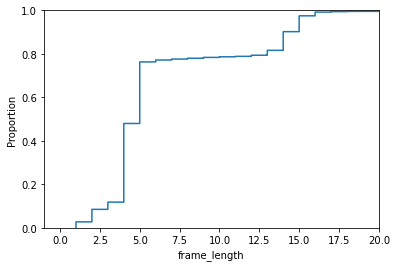

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
dfn = df.reset_index()
sns.ecdfplot(data=dfn, x = 'frame_length')
plt.xlim([-1, 20])